In [1]:
import numpy as np
import random, math, copy
import matplotlib.pyplot as plt
import sys


In [2]:
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmax
from numpy import min
from numpy import around

In [3]:
def GrieFunc(data): #Objective function
    s1 = 0.
    s2 = 1.
    for k, x in enumerate(data):
        s1 = s1 + x ** 2
        s2 = s2 * math.cos(x/math.sqrt(k+1))
    y = (1./4000.) * s1-s2 + 1
    return 1./(1. + y)

In [4]:
def Sphere(x):
    ss=sum(np.power(x, 2))
    return ss

In [5]:
def RastFunc(data):
    """
    Rastrigin function
    """
    s = 10 * 25
    for i in data:
        s = s + i ** 2 - 10 * math.cos(2 * math.pi * i)
    return 1./(1.+s)

In [6]:
class ABSIndividual:
    def __init__(self, bound):
        self.score = 0.
        self.invalidCount = 0 #Invalid times (the cumulative number of times the score is not updated)
        self.chrom = [random.uniform(a,b) for a,b in zip(bound[0,:],bound[1,:])] #random initialization
        self.calculateFitness()        

    def calculateFitness(self):
        self.score = GrieFunc(self.chrom)
        #self.score = Sphere(self.chrom)
        #self.score = RastFunc(self.chrom)  

In [7]:

# define mutation operation
def mutation(x, F):
    return x[0] + F * (x[1] - x[2])


# define boundary check operation
def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[0,i], bounds[1,i]) for i in range(len(bounds[0]))]
    return mutated_bound


# define crossover operation
def crossover(mutated, target, dims, cr):
    # generate a uniform random value for every dimension
    p = rand(dims)
    # generate trial vector by binomial crossover
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial


In [11]:
class ArtificialBeeSwarm:
    def __init__(self, foodCount, onlookerCount, bound, maxIterCount=1000, maxInvalidCount=200):
        self.foodCount = foodCount                 
        self.onlookerCount = onlookerCount           
        self.bound = bound
        self.F = 0.5  # define scale factor for mutation
        self.cr=0.7  # define crossover rate for recombination
        self.maxIterCount = maxIterCount           
        self.maxInvalidCount = maxInvalidCount    
        self.foodList = [ABSIndividual(self.bound) for k in range(self.foodCount)]
        self.foodScore = [d.score for d in self.foodList]  
        self.bestFood = self.foodList[np.argmax(self.foodScore)]

        

    def updateFood(self, i):         
        vj = copy.deepcopy(self.foodList[i]) 
        candidates = [candidate for candidate in range(self.foodCount) if candidate != i]
        ia,ib,ic=tuple(choice(candidates,3,replace=False))
        a=np.asarray(self.foodList[ia].chrom)
        b=np.asarray(self.foodList[ib].chrom)
        c=np.asarray(self.foodList[ic].chrom)

        mutated = mutation([a, b, c], self.F)
        mutated = check_bounds(mutated, self.bound)
        trial = crossover(mutated, self.foodList[i].chrom, len(self.bound[0]), self.cr)
        vj.chrom=trial
        vj.calculateFitness()
        
        if vj.score > self.foodList[i].score:           
            self.foodList[i] = vj
            if vj.score > self.foodScore[i]:            
                self.foodScore[i] = vj.score
                if vj.score > self.bestFood.score:     
                    self.bestFood = vj
            self.foodList[i].invalidCount = 0
        else:
            self.foodList[i].invalidCount += 1
            
    def employedBeePhase(self):
        for i in range(0, self.foodCount):              
            self.updateFood(i)            

    def onlookerBeePhase(self):
        maxScore = np.max(self.foodScore)        
        accuFitness = [(0.9*d/maxScore+0.1, k) for k,d in enumerate(self.foodScore)] 
        for k in range(0, self.onlookerCount):
            i = random.choice([d[1] for d in accuFitness if d[0] >= random.random()]) 
            self.updateFood(i)

    def scoutBeePhase(self):
        for i in range(0, self.foodCount):
            if self.foodList[i].invalidCount > self.maxInvalidCount:                    
                self.foodList[i] = ABSIndividual(self.bound)
                self.foodScore[i] = max(self.foodScore[i], self.foodList[i].score)

    def solve(self):
        trace = []
        trace.append((self.bestFood.score, np.mean(self.foodScore)))

    
        for k in range(self.maxIterCount):
            self.employedBeePhase()
            self.onlookerBeePhase()
            self.scoutBeePhase()
            trace.append((self.bestFood.score, np.mean(self.foodScore)))
            tt=self.bestFood.score
            tt=(1-tt)/tt
            print("\r['At iteration '"+ str(k)+ "' the best fitness is '"+ str(tt)+"']")
        self.printResult(np.array(trace))

    def printResult(self, trace):
        y = np.arange(0, trace.shape[0])
        plt.plot(y, [(1-d)/d for d in trace[:, 0]], 'r', label='optimal value')
#       plt.plot(y, [(1-d)/d for d in trace[:, 1]],'g', label='average value')
        plt.xlabel("Iteration")
        plt.ylabel("function value")
        plt.title("Artificial Bee Swarm algorithm for function optimization")
        plt.legend()
        plt.show()

['At iteration '0' the best fitness is '432.66931408982276']
['At iteration '1' the best fitness is '409.52986381552375']
['At iteration '2' the best fitness is '362.199168981443']
['At iteration '3' the best fitness is '362.199168981443']
['At iteration '4' the best fitness is '303.3171524295987']
['At iteration '5' the best fitness is '303.3171524295987']
['At iteration '6' the best fitness is '248.2205645014972']
['At iteration '7' the best fitness is '248.2205645014972']
['At iteration '8' the best fitness is '241.67862751763022']
['At iteration '9' the best fitness is '171.83078234565528']
['At iteration '10' the best fitness is '111.18158381250704']
['At iteration '11' the best fitness is '111.18158381250704']
['At iteration '12' the best fitness is '111.18158381250704']
['At iteration '13' the best fitness is '84.22945350472983']
['At iteration '14' the best fitness is '84.22945350472983']
['At iteration '15' the best fitness is '84.22945350472983']
['At iteration '16' the best 

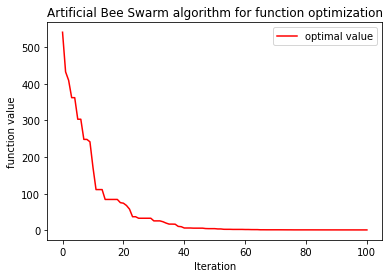

In [12]:
if __name__ == "__main__":
    random.seed()
    vardim = 25
    bound = np.tile([[-600], [600]], vardim)
    abs = ArtificialBeeSwarm(30, 30, bound, 100, 200)
    #(foodCount, onlookerCount, bound, maxIterCount=1000, maxInvalidCount=200)
    abs.solve()